v1:  [0.00000000e+00 8.77192982e-04 1.75438596e-03 2.63157895e-03
 3.50877193e-03 4.38596491e-03 5.26315789e-03 6.14035088e-03
 7.01754386e-03 7.89473684e-03 8.77192982e-03 9.64912281e-03
 1.05263158e-02 1.14035088e-02 1.22807018e-02 1.31578947e-02
 6.66666667e-02 9.14855072e-02 9.55056180e-02 9.98062016e-02
 1.04417671e-01 1.09375000e-01 1.14718615e-01 1.20495495e-01
 1.26760563e-01 1.33578431e-01 1.41025641e-01 1.49193548e-01
 1.58192090e-01 1.68154762e-01 1.79245283e-01 1.33333333e-01
 1.82065217e-01 1.89138577e-01 1.96705426e-01 2.04819277e-01
 2.13541667e-01 2.22943723e-01 2.33108108e-01 2.44131455e-01
 2.56127451e-01 2.69230769e-01 2.83602151e-01 2.99435028e-01
 3.16964286e-01 2.00000000e-01 2.72644928e-01 2.82771536e-01
 2.93604651e-01 3.05220884e-01 3.17708333e-01 3.31168831e-01
 3.45720721e-01 3.61502347e-01 3.78676471e-01 3.97435897e-01
 4.18010753e-01 4.40677966e-01 2.66666667e-01 3.63224638e-01
 3.76404494e-01 3.90503876e-01 4.05622490e-01 4.21875000e-01
 4.39393939e-01 4.5

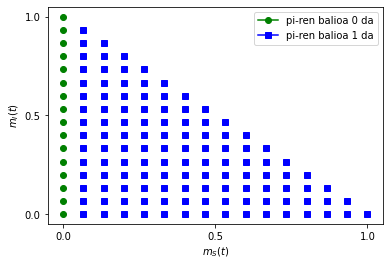

In [11]:
from decimal import Decimal, getcontext
getcontext().prec = 9
import matplotlib.pyplot as plt
import numpy as np

def definitu_v0(zki):
    v0=np.ones(zki)
    for i in range(zki):
        v0[i]=i
        return v0

def politikaoptimoa(N,c,delta,gamma,rho,ct):
    S=[]
    for i in range(N+1):
        for j in range(N+1):
            if (i/N+j/N)<=1:
                S.append((i/N,j/N))
    v1=np.zeros(len(S))
    v0=np.ones(len(S))
    balio1=0
    balio2=1
    cont=0
    pi=np.full(len(S), None)
    while cont==0:
        for elem in S:
            if elem[0]==0 and elem[1]==0:
                v1[S.index(elem)]=0
                pi[S.index(elem)]=0
            if elem[0]!=0 and elem[1]==0:
                v1[S.index(elem)]=elem[0]
                pi[S.index(elem)]=1
            if elem[0]==0 and elem[1]!=0:
                v1[S.index(elem)]=c*elem[1]+delta*rho*v0[S.index((elem[0],Decimal(elem[1]-int(1/N))))]
                pi[S.index(elem)]=0
            if elem[0]!=0 and elem[1]!=0:
                fv1=(ct-balio1)*elem[0]+c*elem[1]+delta*(gamma*balio1*elem[1]*v0[S.index((Decimal(elem[0]-int(1/N)),
                                                      Decimal(elem[1]+int(1/N))))]+rho*v0[S.index((elem[0],Decimal(elem[1]-int(1/N))))])
                fv2=(ct-balio2)*elem[0]+c*elem[1]+delta*(gamma*balio2*elem[1]*v0[S.index((Decimal(elem[0]-int(1/N)),
                                                      Decimal(elem[1]+int(1/N))))]+rho*v0[S.index((elem[0],Decimal(elem[1]-int(1/N))))])
                if fv1<fv2:
                    v1[S.index(elem)]=fv1
                    pi[S.index(elem)]=balio1
                else:
                    v1[S.index(elem)]=fv2
                    pi[S.index(elem)]=balio2
        if (v0 == v1).all():
            cont==1
            print('v1: ',v1, "\n Erabilitako pi-ren balioak: ", pi)
            print('S: ',S)
            break
        else:
            pi=np.full(len(S), None)
            cont==0
            v0=v1
            v1=np.zeros(len(S))

    b=0
    a=0
    for elem in S:
        x=elem[0]
        y=elem[1]
        if pi[S.index(elem)]==1:
            if b==0:
                plt.plot(x,y,marker='s',color='b',label='pi-ren balioa 1 da')
                b=1
            else:
                plt.plot(x,y,marker='s',color='b')
        if pi[S.index(elem)]==0:
            if a==0:
                plt.plot(x,y,marker='o',color='g',label='pi-ren balioa 0 da')
                a=1
            else:
                plt.plot(x,y,marker='o',color='g')


    plt.xlabel('$m_S(t)$')
    plt.ylabel('$m_I(t)$')
    plt.yticks([0,0.5,1])
    plt.xticks([0,0.5,1])
    plt.legend(loc='upper right')
    plt.show()
      
        
politikaoptimoa(15,0.01,0.6,0.6,0.4,2)
